In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import sys
import localSettings as ls
import math
print(ls.main_path)
import load_data_run123
import plotter_alex
import importlib
importlib.reload(plotter_alex)
import uproot
import matplotlib.pylab as pylab
import numpy as np
import math
from sklearn.model_selection import train_test_split
import pickle
import xgboost as xgb
import nue_booster 
importlib.reload(nue_booster)
import awkward
from matplotlib import gridspec
from collections import defaultdict

/home/alex/NuMI/PELEE/


In [26]:
ending = "Jan19"

##THINK - did you last unfold with nuwro or without?

##  Energy

## Closure Tests

## Blockwise Unfolding

In [27]:

with open('../blockwise/stv-analysis-new/blockwise_unsmeared_events_energy_MC_ONLY_weighted_recoCut_incErr_'+ending+'.csv') as file:
    content = file.readlines()
events = content[0:]
    
for i in range(12):
    events[i]=events[i].rstrip().rstrip(',')
    events[i] = float(events[i])
    
print("Unsmeared events")
print(events)
print("")

#------------------------------------------------------------------------------
with open('../blockwise/stv-analysis-new/blockwise_unsmeared_AC_energy_MC_ONLY_weighted_recoCut_incErr_'+ending+'.csv') as file:
    content = file.readlines()
AC = content[0:]
    
for i in range(144):
    AC[i]=AC[i].rstrip().rstrip(',')
    AC[i] = float(AC[i])
    

chunks = [AC[x:x+12] for x in range(0, len(AC), 12)]

print("AC")
print(chunks)
print("")
#---------------------------------------------------------------

with open('nue_full_500_catsel_nopions_recoE_usingSelection_prior_true_signal_blockwise_recoCut_comb_'+ending+'.csv') as file:
    content = file.readlines()
prior_true = content[0:]
    
for i in range(12):
    prior_true[i]=prior_true[i].rstrip().rstrip(',')
    prior_true[i] = float(prior_true[i])
    
print("Prior Truth: ")
print(prior_true)
print("")

#----------------------------------------------------------------
with open('../blockwise/stv-analysis-new/blockwise_unsmeared_errors_energy_MC_ONLY_weighted_recoCut_incErr_'+ending+'.csv') as file:
    content = file.readlines()
errs = content[0:]
    
for i in range(12):
    errs[i]=errs[i].rstrip().rstrip(',')
    errs[i] = float(errs[i])
    
print("Errors: ")
print(errs)
print("")
print("################################################################")
print("")

#----------------------------------------------------------------
with open('../blockwise/stv-analysis-new/blockwise_unsmeared_cov_matrix_energy_MC_ONLY_weighted_recoCut_incErr_'+ending+'.csv') as file:
    content = file.readlines()
cov = content[0:]
    
for i in range(144):
    cov[i]=cov[i].rstrip().rstrip(',')
    cov[i] = float(cov[i])
    

chunks_cov = [cov[x:x+12] for x in range(0, len(cov), 12)]

print("cov")
print(chunks_cov)
print("")


Unsmeared events
[159.538, 485.19, 243.57, 123.98, 40.1315, 73.2459, 3583.24, 8623.87, 4498.53, 3225.18, 569.154, 141.616]

AC
[[0.20149, 0.140195, 0.127621, 0.0480643, -0.012406, 0.0376973, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.140195, 0.686814, 0.266425, 0.145144, -0.00252526, 0.085755, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.127621, 0.266425, 0.232864, 0.0756239, 0.0105739, 0.00314629, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0480643, 0.145144, 0.0756239, 0.114787, 0.117997, -0.0742769, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [-0.012406, -0.00252526, 0.0105739, 0.117997, 0.353271, 0.0141605, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0376973, 0.085755, 0.00314629, -0.0742769, 0.0141605, 0.375366, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.474059, 0.0165829, 0.0714377, 0.118322, 0.0212399, 0.00518687], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0165829, 0.795321, 0.149125, 0.0285186, 0.00667296, 0.00211968], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0714377, 0.149125, 0.338905, 0.221835, 0.0366416, 0.00876921], [0.0

In [28]:
with open('../blockwise/stv-analysis-new/blocks_12.txt') as file:
    content = file.readlines()
blocks = content[0:]

print(blocks)

['12\n', '0  0\n', '1  0\n', '2  0\n', '3  0\n', '4  0\n', '5  0\n', '6  1\n', '7  1\n', '8  1\n', '9  1\n', '10 1\n', '11 1\n', '12\n', '0  0\n', '1  0\n', '2  0\n', '3  0\n', '4  0\n', '5  0\n', '6  1\n', '7  1\n', '8  1\n', '9  1\n', '10 1\n', '11 1\n']


In [29]:

made_data_sig = np.dot(prior_true, chunks)
print("Prior_Truth x AC: ")
print(made_data_sig)
print("")
print("")
print("Unfolding Done with MC Data Signal: ")
print(events)
print("")

diff = made_data_sig - events
print("")
print("Difference")
print(diff)

#for i in made_data_sig:
#    print(i)

print("")
diffasfrac = np.nan_to_num(diff/made_data_sig)
print(diffasfrac*100)

Prior_Truth x AC: 
[ 159.53942055  485.19214852  243.57153766  123.98076549   40.13193254
   73.2465716  3583.24222878 8623.86521399 4498.52305873 3225.18150758
  569.15466344  141.61618713]


Unfolding Done with MC Data Signal: 
[159.538, 485.19, 243.57, 123.98, 40.1315, 73.2459, 3583.24, 8623.87, 4498.53, 3225.18, 569.154, 141.616]


Difference
[ 0.00142055  0.00214852  0.00153766  0.00076549  0.00043254  0.0006716
  0.00222878 -0.00478601 -0.00694127  0.00150758  0.00066344  0.00018713]

[ 8.90408620e-04  4.42819082e-04  6.31298738e-04  6.17428341e-04
  1.07779400e-03  9.16906034e-04  6.22002176e-05 -5.54972790e-05
 -1.54301131e-04  4.67440772e-05  1.16565297e-04  1.32137530e-04]


ValueError: weights should have the same shape as x

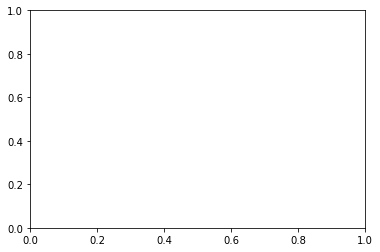

In [30]:
pyplot.hist(count, bins, weights=prior_true, alpha=0.5, label='Difference')
pyplot.legend(loc='upper right')
pyplot.xlabel("Bin Number")
pyplot.ylabel("Count")
pyplot.show()

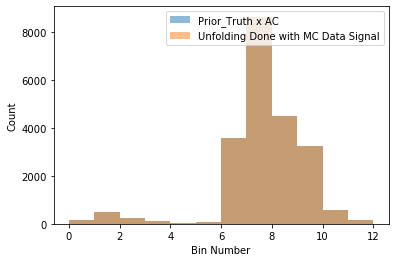

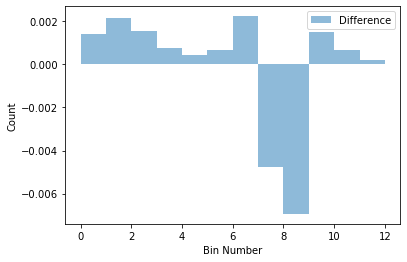

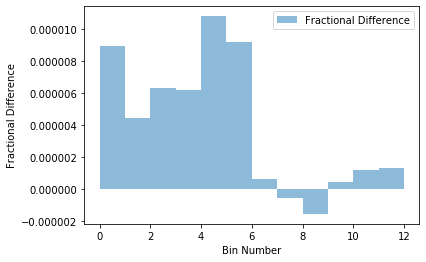

In [31]:
import random
import numpy
from matplotlib import pyplot

bins = np.arange(0, 13, 1)
count = np.arange(0.0, 12.0, 1)

pyplot.hist(count, bins, weights=made_data_sig, alpha=0.5, label='Prior_Truth x AC')
pyplot.hist(count, bins, weights=events, alpha=0.5, label='Unfolding Done with MC Data Signal')
pyplot.legend(loc='upper right')
pyplot.xlabel("Bin Number")
pyplot.ylabel("Count")
pyplot.show()

pyplot.hist(count, bins, weights=diff, alpha=0.5, label='Difference')
pyplot.legend(loc='upper right')
pyplot.xlabel("Bin Number")
pyplot.ylabel("Count")
pyplot.show()


pyplot.hist(count, bins, weights=diffasfrac, alpha=0.5, label='Fractional Difference')
pyplot.legend(loc='upper right')
pyplot.xlabel("Bin Number")
pyplot.ylabel("Fractional Difference")
pyplot.show()

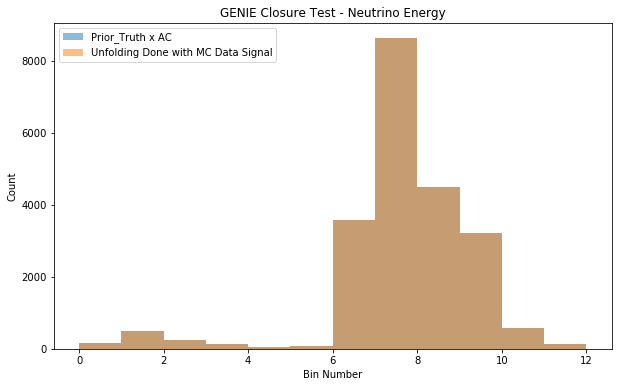

In [32]:
fig = plt.figure(figsize=(10, 6))

pyplot.hist(count, bins, weights=made_data_sig, alpha=0.5, label='Prior_Truth x AC')
pyplot.hist(count, bins, weights=events, alpha=0.5, label='Unfolding Done with MC Data Signal')
pyplot.legend(loc='upper left')
pyplot.xlabel("Bin Number")
pyplot.ylabel("Count")
pyplot.title("GENIE Closure Test - Neutrino Energy")
pyplot.show()

fig.savefig("GENIE_closure_test_"+ending+".svg",bbox_inches='tight' )

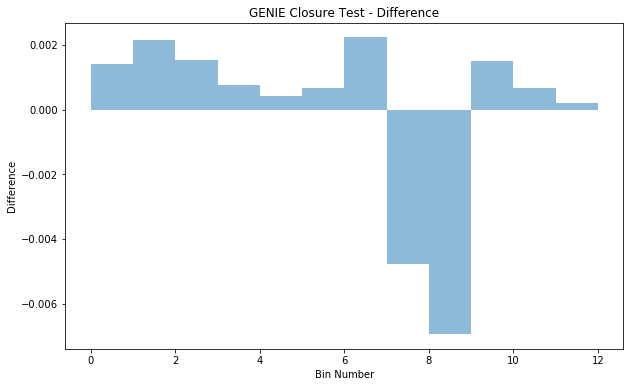

In [33]:
fig = plt.figure(figsize=(10, 6))

pyplot.hist(count, bins, weights=diff, alpha=0.5)
#pyplot.legend(loc='upper right')
pyplot.xlabel("Bin Number")
pyplot.ylabel("Difference")
pyplot.title("GENIE Closure Test - Difference")
pyplot.show()

fig.savefig("GENIE_closure_test_diff_"+ending+".svg",bbox_inches='tight' )

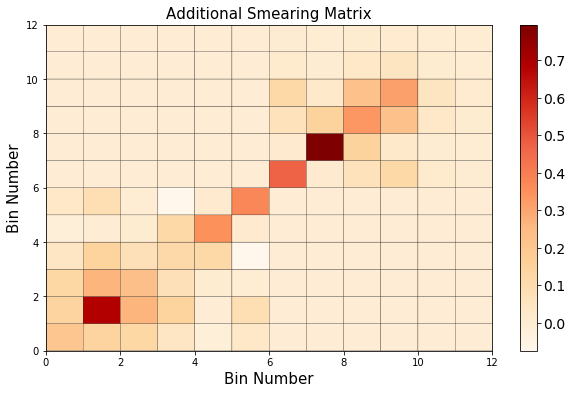

In [34]:
fig = plt.figure(figsize=(10, 6))  
    
plt.pcolor(bins, bins, chunks, cmap='OrRd', edgecolors='k')#, vmin=-1, vmax=1)
            
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)
#cbar.set_label(r"Log (Power)", size=15)

plt.xlabel('Bin Number', fontsize=15)
plt.ylabel('Bin Number', fontsize=15)

plt.title('Additional Smearing Matrix', fontsize=15)

plt.show()

fig.savefig("GENIE_closure_test_Ac_"+ending+".svg",bbox_inches='tight' )

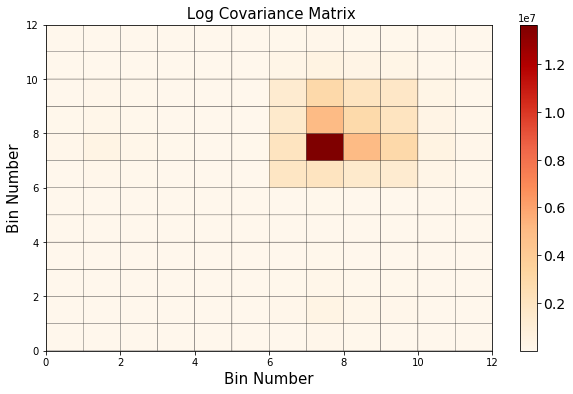

In [35]:
fig = plt.figure(figsize=(10, 6))  

#print(bins)
#bins = np.arange(0, 17, 1)
#count = np.arange(0.0, 16.0, 1)
    
plt.pcolor(bins, bins, (chunks_cov), cmap='OrRd', edgecolors='k')#, vmin=-1, vmax=1)
            
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)
#cbar.set_label(r"Log (Power)", size=15)

plt.xlabel('Bin Number', fontsize=15)
plt.ylabel('Bin Number', fontsize=15)

plt.title(' Log Covariance Matrix', fontsize=15)

plt.show()

## Need to convert to xsec units

xsec = unfolded event counts / (integrated flux * number of argon targets)

In [12]:
###################
### #N argon target calculation
###################

density = 1.3836  #g/cm^3
volume = (246-10)*(106-(-106))*(1026-10)         #cm^3
NA = 6.022E23   #atoms/mol
Nnuc = 40       #nucleans / atom
mmol = 39.95    #g/mol

Narg = (density * volume * NA * Nnuc)/mmol   #nucleons

print("number of argon targets = ", Narg)

number of argon targets =  4.240685683288815e+31


In [13]:
#Need R1 AND R3

####NUE
POT_R1 = 2.0E20 
int_flux_per_POT_R1 = 1.1864530596659353e-11
POT_R3 = 5.014E20
int_flux_per_POT_R3 = 8.628376225834778e-12

int_flux = (int_flux_per_POT_R1*POT_R1) + (int_flux_per_POT_R3*POT_R3)    #cm^-2

print("Nue integrated flux: ", int_flux)

####NUMU

POT_numu_R1 = 2.0E20 
int_flux_per_POT_numu_R1 = 5.455771063338641e-10
POT_numu_R3 = 5.014E20 
int_flux_per_POT_numu_R3 = 3.6729003479115414e-10

int_flux_numu = (int_flux_per_POT_numu_R1*POT_numu_R1) + (int_flux_per_POT_numu_R3*POT_numu_R3)    #cm^-2

print("Numu integrated flux: ", int_flux_numu)

Nue integrated flux:  6699173958.965427
Numu integrated flux:  293274644711.0575


In [14]:
nue_events = np.array(events[0:6])
numu_events = np.array(events[6:12])

nue_errs = np.array(errs[0:6])
numu_errs = np.array(errs[6:12])

In [15]:
#number of events

xsec_nue_events = nue_events / (int_flux * Narg )     
xsec_numu_events = numu_events / (int_flux_numu * Narg )     


#uncertainty

#xsec_nue_errs = nue_errs / (int_flux * Narg )     
#xsec_numu_errs = numu_errs / (int_flux_numu * Narg )     

In [16]:
#Need the four sections of the cov matrix

blockwise_errs = chunks_cov
#print(blockwise_errs)
#print("")

#NUE ONLY
bot_left = blockwise_errs[:6]
for i in range(len(bot_left)):
    bot_left[i] = bot_left[i][:6]
    
nue_errs_bot = np.array(bot_left)/((int_flux*int_flux)*(Narg*Narg))
xsec_nue_errs = (np.sqrt(np.diag(nue_errs_bot)))
    
#MIX
bot_right = blockwise_errs[:6]
for i in range(len(bot_right)):
    bot_right[i] = bot_right[i][6:]
    
mix_errs_bot = np.array(bot_right)/((int_flux*int_flux_numu)*(Narg*Narg))
xsec_botmix_errs = np.nan_to_num(np.sqrt(np.diag(mix_errs_bot)))

    
#MIX
top_left = blockwise_errs[6:]
for i in range(len(top_left)):
    top_left[i] = top_left[i][:6]
    
mix_errs_top = np.array(top_left)/((int_flux*int_flux_numu)*(Narg*Narg))
xsec_topmix_errs = np.nan_to_num(np.sqrt(np.diag(mix_errs_top)))

#NUMU ONLY
top_right = blockwise_errs[6:]
for i in range(len(top_right)):
    top_right[i] = top_right[i][6:]
    
numu_errs_top = np.array(top_right)/((int_flux_numu*int_flux_numu)*(Narg*Narg))
xsec_numu_errs = (np.sqrt(np.diag(numu_errs_top)))


In [17]:
### Calculate ratio uncertainties

xsec_ratio_events = np.nan_to_num(xsec_nue_events/xsec_numu_events)
print("Ratio event counts: ", xsec_ratio_events)
print("")

#####################

ratio_sq = (xsec_nue_events/xsec_numu_events)*(xsec_nue_events/xsec_numu_events)
print("ratio_sq: ", ratio_sq)
print("")
nue_term = (xsec_nue_errs*xsec_nue_errs)/(xsec_nue_events*xsec_nue_events)
print("nue: ", nue_term)
print("")
numu_term = (xsec_numu_errs*xsec_numu_errs)/(xsec_numu_events*xsec_numu_events)
print("numu: ", numu_term)
print("")
mix_1 = (xsec_botmix_errs*xsec_botmix_errs)/(xsec_numu_events*xsec_nue_events)
print("mix: ", mix_1)
print("")
mix_2 = (xsec_topmix_errs*xsec_topmix_errs)/(xsec_numu_events*xsec_nue_events)
print("mix: ", mix_2)
print("")

ratio_var_errs = ratio_sq*(nue_term + numu_term - mix_1 - mix_2)
print(ratio_var_errs)
xsec_ratio_errs = np.nan_to_num(np.sqrt(abs(ratio_var_errs)))
print("Ratio errs: ", xsec_ratio_errs)

Ratio event counts:  [ 1.88446173  2.49818664  2.49879638  2.73994211  4.96762455 41.01640187]

ratio_sq:  [   3.55119603    6.24093647    6.24398337    7.50728275   24.67729371
 1682.34522203]

nue:  [0.12077741 0.10623515 0.10601767 0.10028192 0.13137605 0.14144442]

numu:  [0.44463717 0.19615544 0.19827264 0.63749808 0.76328153 0.68525829]

mix:  [0.09694441 0.09486062 0.08447807 0.09082603 0.08285908 0.10983646]

mix:  [0.09694441 0.09486062 0.08447807 0.09082603 0.08285908 0.10983646]

[1.31936083e+00 7.03162207e-01 8.45024257e-01 4.17500960e+00
 1.79882522e+01 1.02123367e+03]
Ratio errs:  [ 1.14863433  0.83854768  0.91925201  2.04328402  4.24125597 31.95674687]


In [18]:
print(xsec_nue_events)
print("")
print(xsec_numu_events)
print("")
print(xsec_nue_errs)
print("")
print(xsec_numu_errs)

[4.69958717e-40 1.68874111e-39 9.19311354e-40 4.41182717e-40
 1.37975903e-40 2.90754814e-40]

[2.49386182e-40 6.75986768e-40 3.67901666e-40 1.61018992e-40
 2.77750264e-41 7.08874501e-42]

[1.63324964e-40 5.50423782e-40 2.99331038e-40 1.39710746e-40
 5.00105166e-41 1.09350260e-40]

[1.66293498e-40 2.99390746e-40 1.63818577e-40 1.28563162e-40
 2.42659253e-41 5.86808644e-42]


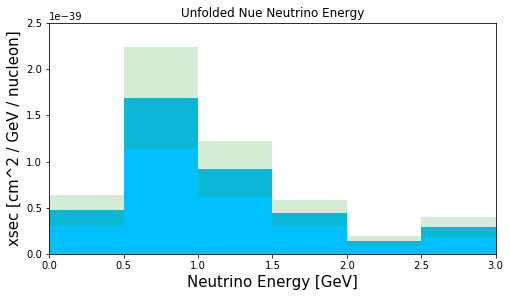

In [19]:
import random
import numpy
from matplotlib import pyplot
"""
bins = np.arange(0, 5.5, 0.5)
count = np.arange(0.1, 5.1, 0.5)
print(count)

plt.ylim(0, 5E-39)

plt.xlabel("Energy [GeV]")
plt.ylabel("xsec [cm^2]")

pyplot.hist(count, bins, weights=xsec_nue_events, alpha=0.5)
#pyplot.legend(loc='upper right')
pyplot.show()
"""

nue_fig = plt.figure(figsize=(8, 7))
nue_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
nue_ax1 = plt.subplot(nue_gs[0])
nue_ax1.set_xlim([0, 3])

bins = np.arange(0, 3.5, 0.5)
bincenters = np.arange(0.25, 3.25, 0.5)
bin_edges = np.arange(0, 3.5, 0.5)
bin_size = [(bin_edges[i + 1] - bin_edges[i]) / 2
            for i in range(len(bin_edges) - 1)]
count = np.arange(0.1, 3.1, 0.5)
weights = []
for i in range(len(count)):
    weight = count[i]*xsec_nue_events[i]
    weights.append(weight)

sel = nue_ax1.hist(count, bins, color='deepskyblue', weights=xsec_nue_events)
plt.ylim(0, 2.5E-39)
nue_ax1.set_xlabel('Neutrino Energy [GeV]', fontsize=15)
nue_ax1.set_ylabel('xsec [cm^2 / GeV / nucleon]', fontsize=15)
nue_ax1.set_title("Unfolded Nue Neutrino Energy")

lower_err = np.nan_to_num(xsec_nue_events-xsec_nue_errs)

nue_ax1.bar(bincenters, xsec_nue_errs*2,width=[n*2 for n in bin_size],facecolor='tab:green',alpha=0.2,bottom=(lower_err))

nue_fig.savefig("unfolded_MC_nue_"+ending+".svg",bbox_inches='tight' )

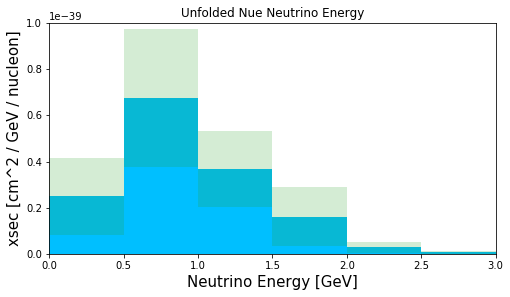

In [20]:
import random
import numpy
from matplotlib import pyplot

numu_fig = plt.figure(figsize=(8, 7))
numu_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
numu_ax1 = plt.subplot(numu_gs[0])
numu_ax1.set_xlim([0, 3])

bins = np.arange(0, 3.5, 0.5)
bincenters = np.arange(0.25, 3.25, 0.5)
bin_edges = np.arange(0, 3.5, 0.5)
bin_size = [(bin_edges[i + 1] - bin_edges[i]) / 2
            for i in range(len(bin_edges) - 1)]
count = np.arange(0.1, 3.1, 0.5)
weights = []
for i in range(len(count)):
    weight = count[i]*xsec_numu_events[i]
    weights.append(weight)

sel = numu_ax1.hist(count, bins, color='deepskyblue', weights=xsec_numu_events)
plt.ylim(0, 1E-39)
numu_ax1.set_xlabel('Neutrino Energy [GeV]', fontsize=15)
numu_ax1.set_ylabel('xsec [cm^2 / GeV / nucleon]', fontsize=15)
numu_ax1.set_title("Unfolded Nue Neutrino Energy")

lower_err = np.nan_to_num(xsec_numu_events-xsec_numu_errs)

numu_ax1.bar(bincenters, xsec_numu_errs*2,width=[n*2 for n in bin_size],facecolor='tab:green',alpha=0.2,bottom=(lower_err))

numu_fig.savefig("unfolded_MC_numu_"+ending+".svg",bbox_inches='tight' )

[ 1.88446173  2.49818664  2.49879638  2.73994211  4.96762455 41.01640187]
[ 1.88446173  2.49818664  2.49879638  2.73994211  4.96762455 41.01640187]


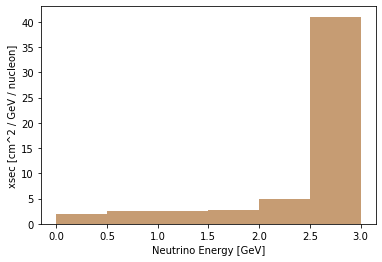

In [21]:
#Think need to replace 2nd bin due to unfolding

import random
import numpy
from matplotlib import pyplot

bins = np.arange(0, 3.5, 0.5)
count = np.arange(0.1, 3.1, 0.5)
#print(count)

#plt.ylim(0, 35)
plt.xlabel("Neutrino Energy [GeV]")
plt.ylabel("xsec [cm^2 / GeV / nucleon]")

print(xsec_nue_events/xsec_numu_events)
print(xsec_ratio_events)

pyplot.hist(count, bins, weights=np.nan_to_num(xsec_nue_events/xsec_numu_events), alpha=0.5)
pyplot.hist(count, bins, weights=xsec_ratio_events, alpha=0.5)

#pyplot.legend(loc='upper right')
pyplot.show()


[ 1.88446173  2.49818664  2.49879638  2.73994211  4.96762455 41.01640187]


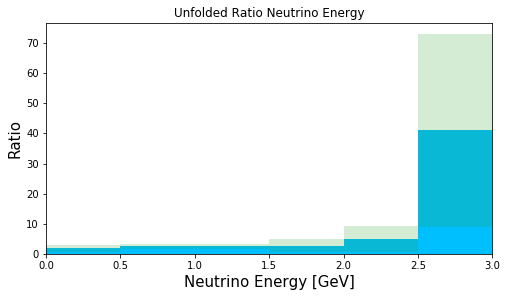

In [22]:
import random
import numpy
from matplotlib import pyplot


ratio_fig = plt.figure(figsize=(8, 7))
ratio_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
ratio_ax1 = plt.subplot(ratio_gs[0])
ratio_ax1.set_xlim([0, 3])

bins = np.arange(0, 3.5, 0.5)
bincenters = np.arange(0.25, 3.25, 0.5)
bin_edges = np.arange(0, 3.5, 0.5)
bin_size = [(bin_edges[i + 1] - bin_edges[i]) / 2
            for i in range(len(bin_edges) - 1)]
count = np.arange(0.1, 3.1, 0.5)
#print(len(count))
#weights = []
#for i in range(len(count)):
#    weight = count[i]*xsec_ratio_events[i]
#    weights.append(weight)


#test_weights = [(random.random()/random.random() - 0.75) for x in range(len(count))]
#print(count)
#xsec_ratio_events[7] = 0
#print(xsec_ratio_events)
print("")
sel = ratio_ax1.hist(count, bins, color='deepskyblue', weights=xsec_ratio_events)  # , weights=xsec_ratio_events
print(sel[0])

#plt.ylim(0, 8)
ratio_ax1.set_xlabel('Neutrino Energy [GeV]', fontsize=15)
ratio_ax1.set_ylabel('Ratio', fontsize=15)
ratio_ax1.set_title("Unfolded Ratio Neutrino Energy")

lower_err = np.nan_to_num(xsec_ratio_events-xsec_ratio_errs)

ratio_ax1.bar(bincenters, xsec_ratio_errs*2,width=[n*2 for n in bin_size],facecolor='tab:green',alpha=0.2,bottom=(lower_err))

ratio_fig.savefig("unfolded_MC_ratio_"+ending+".svg",bbox_inches='tight' )

In [23]:
nue_frac_err = xsec_nue_errs/xsec_nue_events
numu_frac_err = xsec_numu_errs/xsec_numu_events
ratio_frac_err = xsec_ratio_errs/xsec_ratio_events

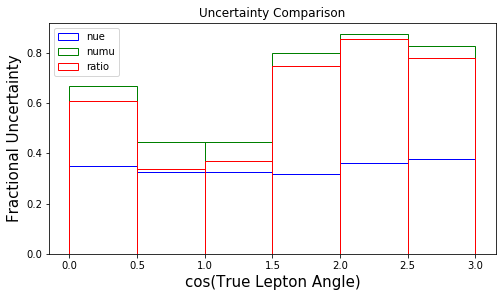

In [24]:
errors_fig = plt.figure(figsize=(8, 7))
errors_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
errors_ax1 = plt.subplot(ratio_gs[0])


bins = np.arange(0, 3.5, 0.5)
count = np.arange(0.1, 3.1, 0.5)
#plt.ylim(0, 1)

sel_nue = errors_ax1.hist(count, bins, edgecolor='blue', facecolor='None', weights=nue_frac_err, label='nue')
sel_numu = errors_ax1.hist(count, bins, edgecolor='green', facecolor='None', weights=numu_frac_err, label='numu')
sel_ratio = errors_ax1.hist(count, bins, edgecolor='red', facecolor='None', weights=ratio_frac_err, label='ratio')
errors_ax1.set_ylabel('Fractional Uncertainty', fontsize=15)
errors_ax1.set_xlabel('cos(True Lepton Angle)', fontsize=15)
errors_ax1.set_title("Uncertainty Comparison")
leg = errors_ax1.legend()